In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif



In [3]:
data = {
    'Age': [25, 34, 45, 23, 35, 52, 46, 29, 31, 40, 38, 27, 50, 28, 33, 48, 30, 26, 42, 36],
    'Salary': [50000, 72000, 98000, 45000, 75000, 120000, 105000, 60000, 64000, 89000, 85000, 56000, 115000, 58000, 70000, 102000, 62000, 51000, 96000, 80000],
    'Experience': [2, 5, 15, 1, 6, 25, 18, 4, 5, 12, 10, 3, 22, 2, 5, 17, 4, 2, 14, 8],
    'Department': [1, 2, 2, 1, 3, 4, 2, 1, 2, 3, 3, 1, 4, 1, 2, 2, 1, 1, 3, 3],
    'Performance_Rating': [3, 4, 5, 2, 4, 5, 5, 3, 4, 5, 5, 3, 5, 3, 4, 5, 3, 3, 5, 4],
    'Education_Level': [2, 3, 3, 1, 3, 4, 3, 2, 3, 4, 4, 2, 4, 2, 3, 3, 2, 2, 4, 3],

    'Country': ['India'] * 20,
    
    'Remote_Work': [1] * 19 + [0],

    'Years_of_Work': [2, 5, 15, 1, 6, 25, 18, 4, 5, 12, 10, 3, 22, 2, 5, 17, 4, 2, 14, 8],

    'Monthly_Income': [4166, 6000, 8166, 3750, 6250, 10000, 8750, 5000, 5333, 7416, 7083, 4666, 9583, 4833, 5833, 8500, 5166, 4250, 8000, 6666],

    'Health_Score': [88, 80, 70, 90, 75, 60, 65, 85, 82, 72, 74, 87, 62, 86, 81, 68, 83, 89, 71, 76],

    'Left_Company': [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)
print(df.head())


   Age  Salary  Experience  Department  Performance_Rating  Education_Level  \
0   25   50000           2           1                   3                2   
1   34   72000           5           2                   4                3   
2   45   98000          15           2                   5                3   
3   23   45000           1           1                   2                1   
4   35   75000           6           3                   4                3   

  Country  Remote_Work  Years_of_Work  Monthly_Income  Health_Score  \
0   India            1              2            4166            88   
1   India            1              5            6000            80   
2   India            1             15            8166            70   
3   India            1              1            3750            90   
4   India            1              6            6250            75   

   Left_Company  
0             0  
1             1  
2             1  
3             0  
4       

In [4]:

X = df.drop(columns=['Left_Company'])
y = df['Left_Company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Age,Salary,Experience,Department,Performance_Rating,Education_Level,Country,Remote_Work,Years_of_Work,Monthly_Income,Health_Score
8,31,64000,5,2,4,3,India,1,5,5333,82
5,52,120000,25,4,5,4,India,1,25,10000,60
11,27,56000,3,1,3,2,India,1,3,4666,87
3,23,45000,1,1,2,1,India,1,1,3750,90
18,42,96000,14,3,5,4,India,1,14,8000,71


In [5]:

constant_feature = [col for col in X_train.columns if X_train[col].nunique() == 1]

print("Constant Features:", constant_feature)

X_train.drop(columns=constant_feature, inplace=True)
X_test.drop(columns=constant_feature, inplace=True)


Constant Features: ['Country']


In [6]:
threshold = 0.98
quasi_features = []

for col in X_train.columns:
    top_freq = X_train[col].value_counts(normalize=True).iloc[0]
    if top_freq >= threshold:
        quasi_features.append(col)

print("Quasi-Constant Features:", quasi_features)



Quasi-Constant Features: []


In [7]:
# Duplicated Features
duplicated_features = []
cols = X_train.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if X_train[cols[i]].equals(X_train[cols[j]]):
            duplicated_features.append(cols[j])

print("Duplicated Features:", duplicated_features)

X_train.drop(columns=duplicated_features, inplace=True)
X_test.drop(columns=duplicated_features, inplace=True)

Duplicated Features: ['Years_of_Work']


In [8]:
numeric_X_train = X_train.select_dtypes(include=['number'])
corr_matrix = numeric_X_train.corr()

corr_threshold = 0.98
corr_pairs = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            corr_pairs.add(corr_matrix.columns[i])

print("Highly Correlated Features:", corr_pairs)


X_train.drop(columns=corr_pairs, inplace=True)
X_test.drop(columns=corr_pairs, inplace=True)

Highly Correlated Features: {'Monthly_Income', 'Health_Score', 'Salary', 'Experience'}


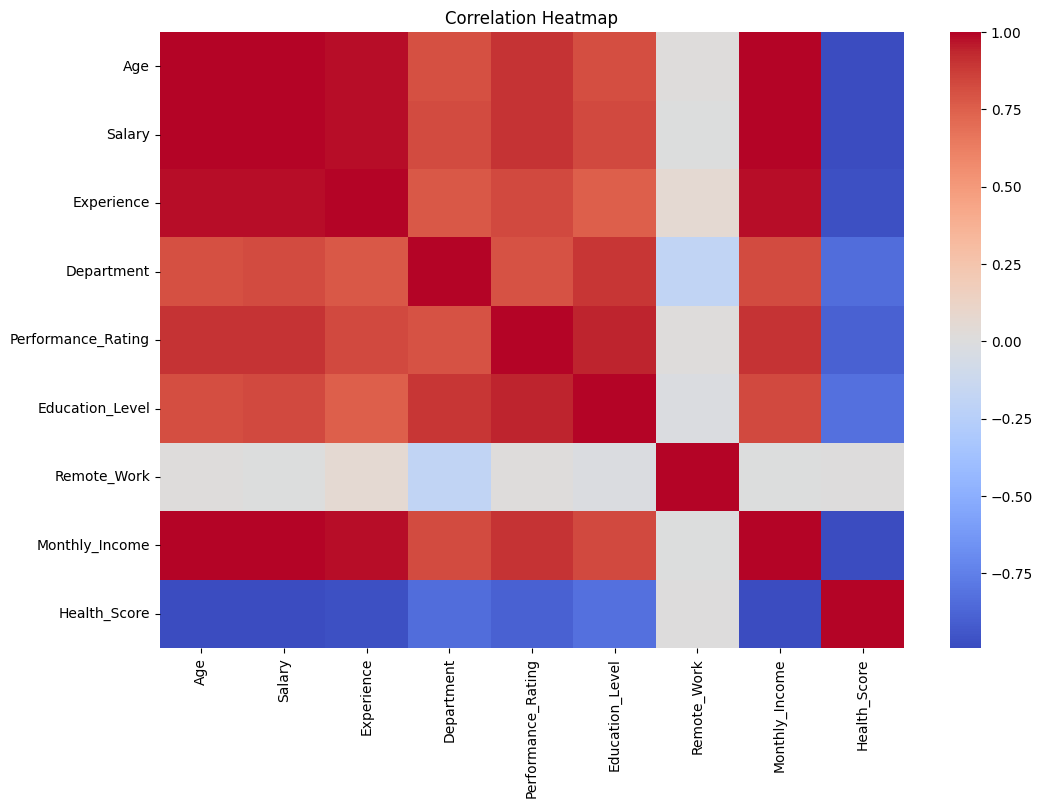

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
numeric_X_train = X_train.select_dtypes(include=['number'])

mi_scores = mutual_info_classif(numeric_X_train, y_train, discrete_features=False)

mi_df = pd.DataFrame({
    "Features": numeric_X_train.columns,
    "MI Score": mi_scores
})


mi_df = mi_df.sort_values(by="MI Score", ascending=False)

print("\nMutual Information Scores:\n", mi_df)

selected_features = mi_df[mi_df["MI Score"] > 0.01]["Features"].tolist()
X_train = X_train[selected_features]
X_test = X_test[selected_features]


Mutual Information Scores:
              Features  MI Score
3     Education_Level  1.028522
4         Remote_Work  0.831647
1          Department  0.653522
2  Performance_Rating  0.570188
0                 Age  0.281051
